In [1]:
'''
Date: 2022.07.22
Title: 비트코인 시세 예측하기
By: Kang Jin Seong
'''
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
'''market price 데이터셋의 기본 정보'''
# Data Source : https://www.blockchain.com/ko/charts/market-price?timespan=60days

file_path = 'C:/Users/USER/DataAnalysis_jupyter/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

# 기본 정보를 출력합니다.

print(bitcoin_df.shape)
print(bitcoin_df.info())
bitcoin_df.tail()

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


In [3]:
# to_datetime으로 day 피처를 시계열 피처로 변환합니다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

#day 데이터프레임의 index로 설정합니다.
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace = True)
bitcoin_df.head()

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000


In [4]:
bitcoin_df.describe()

,price
count,365.000000
mean,8395.863578
std,3239.804756
min,3319.630000
25%,6396.772500
50%,7685.633333
75%,9630.136277
max,19498.683333


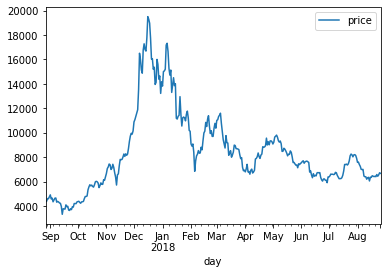

In [5]:
# 일자별로 비트코인 시세를 시각화합니다.
bitcoin_df.plot()
plt.show()

In [6]:
'''
시계열 예측 분석 방법 ARIMA 분석 방법

AR(Autoregreesion): 자기 자신의 과거를 정보로 사용하는 개념, 현재의 상태는 이전의 상태를 참고해서 계산된다
MA(Moving Average): 이전 항에서의 오차를 이용하여 현재 항의 상태를 추론한다.

ARIMA(Autoregreesion Integrated Moving Average): ARMA 모델에 추세변동의 경향성(Momentum)까지 반영항 방법

ARIMA 클래스에 Order = (2,1,2)라고 입력되어진 파라미터:

AR이 몇 번째 과거까지를 바라보는지에 대한 파라미터(2),
차분(Difference)에 대한 파라미터(1),
MA가 몇 번째 과거까지를 바라보는지에 대한 파라미터(2)
'''

'\n시계열 예측 분석 방법 ARIMA 분석 방법\n\nAR(Autoregreesion): 자기 자신의 과거를 정보로 사용하는 개념, 현재의 상태는 이전의 상태를 참고해서 계산된다\nMA(Moving Average): 이전 항에서의 오차를 이용하여 현재 항의 상태를 추론한다.\n\nARIMA(Autoregreesion Integrated Moving Average): ARMA 모델에 추세변동의 경향성(Momentum)까지 반영항 방법\n\nARIMA 클래스에 Order = (2,1,2)라고 입력되어진 파라미터:\n\nAR이 몇 번째 과거까지를 바라보는지에 대한 파라미터(2),\n차분(Difference)에 대한 파라미터(1),\nMA가 몇 번째 과거까지를 바라보는지에 대한 파라미터(2)\n'

In [7]:
### ARIMA 모델 활용하여 학습하기

from statsmodels.tsa.arima.model import ARIMA
#import statsmodels.api as sm
# #(A1R = 2, 차분 = 1, MA = 2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(bitcoin_df.price.values, order = (2,1,2))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.490
Date:                Mon, 25 Jul 2022   AIC                           5584.980
Time:                        13:58:03   BIC                           5604.466
Sample:                             0   HQIC                          5592.725
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2418      0.305      0.793      0.428      -0.356       0.839
ar.L2          0.6071      0.200      3.036      0.002       0.215       0.999
ma.L1         -0.1513      0.306     -0.494      0.6

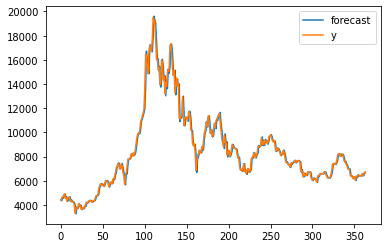

<AxesSubplot:>

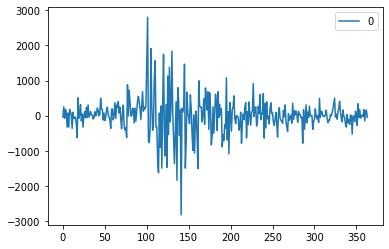

In [8]:
'''학습한 모델이 학습 데이터에 대해서 예측한 결과만을 시각화합니다.'''
# fig = model_fit.plot_predict()    # 학습 데이터에 대한 예측 결과 입니다.(첫 번째 그래프)
fig = model_fit.predict()
plt.figure()
plt.plot(fig[1:], label = 'forecast')
plt.plot(bitcoin_df['price'].tolist()[1:], label = 'y')
plt.legend()
plt.show()

residuals = pd.DataFrame(model_fit.resid[1:])    # 잔차의 변동을 시각화합니다.(두 번쨰 그래프)
residuals.plot()

In [9]:
'''예측 결과인 마지막 5일의 예측값을 실제 데이터와 비교'''
forecast_data = model_fit.forecast(steps = 5)    #학습 데이터셋으로부터 5일 뒤를 예측합니다.
forecast_data1 = model_fit.get_forecast(steps = 5)
# print(forecast_data1)
# #테스트 데이터셋을 불러옵니다.
test_file_path = 'C:/Users/USER/DataAnalysis_jupyter/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds', 'y'])

pred_y = forecast_data.tolist()    # 마지막 5일의 예측 데이터입니다.
test_y = bitcoin_test_df.y.values  # 실제 5일 가격 데이터입니다.
pred_y_lower = []    # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = []    # 마지막 5일의 예측 데이터의 최대값입니다.
# print(forecast_data)

for lower in forecast_data1.summary_frame()['mean_ci_lower']:
    pred_y_lower.append(lower)

for upper in forecast_data1.summary_frame()['mean_ci_upper']:
    pred_y_upper.append(upper)

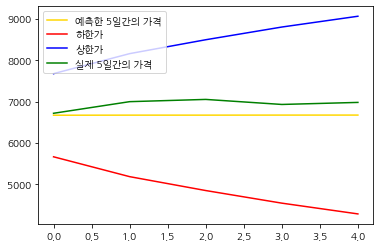

In [10]:
from matplotlib import font_manager

font_fname = 'C:/Users/USER/anaconda3/envs/pybook/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

plt.plot(pred_y, color="gold", label = '예측한 5일간의 가격') # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red",label = '하한가') # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue",label = '상한가') # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green",label = '실제 5일간의 가격') # 실제 가격 그래프입니다.
plt.legend()

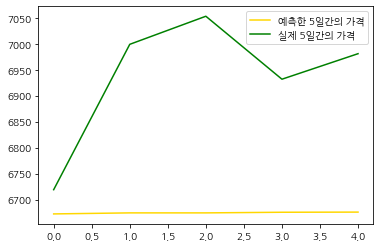

In [11]:
plt.plot(pred_y, color="gold", label = '예측한 5일간의 가격') # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green",label = '실제 5일간의 가격') # 실제 가격 그래프입니다.
plt.legend()
plt.show()

In [12]:
from fbprophet import Prophet

#propher을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다: 'ds', 'y'
bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'])
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True, daily_seasonality = True,
                 changepoint_prior_scale = 0.5)
prophet.fit(bitcoin_df)

Importing plotly failed. Interactive plots will not work.


In [13]:
# 모델로부터 예측할 기간을 정의하고, 결과를 도출
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)

forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
365,2018-08-27,692.587823,6207.658370,7560.972869,692.587823,692.587823,9.600229,9.600229,9.600229,8.920736,...,-0.006676,-0.006676,-0.006676,-0.672817,-0.672817,-0.672817,0.0,0.0,0.0,6870.981231
366,2018-08-28,696.273530,6337.042840,7628.881525,696.273530,696.273530,9.600229,9.600229,9.600229,8.995884,...,0.025062,0.025062,0.025062,-0.629407,-0.629407,-0.629407,0.0,0.0,0.0,6959.869680
367,2018-08-29,699.959236,6252.810658,7662.287354,699.959236,699.959236,9.600229,9.600229,9.600229,8.947336,...,-0.050626,-0.050626,-0.050626,-0.602267,-0.602267,-0.602267,0.0,0.0,0.0,6962.729783
368,2018-08-30,703.644943,6290.893386,7717.509814,696.459870,704.728095,9.600229,9.600229,9.600229,8.982418,...,-0.023609,-0.023609,-0.023609,-0.594202,-0.594202,-0.594202,0.0,0.0,0.0,7024.078025
369,2018-08-31,707.330650,6241.860025,7935.099879,692.572568,717.274982,9.600229,9.600229,9.600229,9.028596,...,0.035742,0.035742,0.035742,-0.607375,-0.607375,-0.607375,0.0,0.0,0.0,7093.533309


In [14]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

'''
ARIMA 모델과 마찬가지로 학습 데이터셋에 대해서는 거의 정확한 예측을 하고 있다.
하지만, 시계열 데이터 분석에서 학습데이터를 잘 예측하는 것은 큰 의미가 없다고 할 수 있습니다.
'''

'\nARIMA 모델과 마찬가지로 학습 데이터셋에 대해서는 거의 정확한 예측을 하고 있다.\n하지만, 시계열 데이터 분석에서 학습데이터를 잘 예측하는 것은 큰 의미가 없다고 할 수 있습니다.\n'

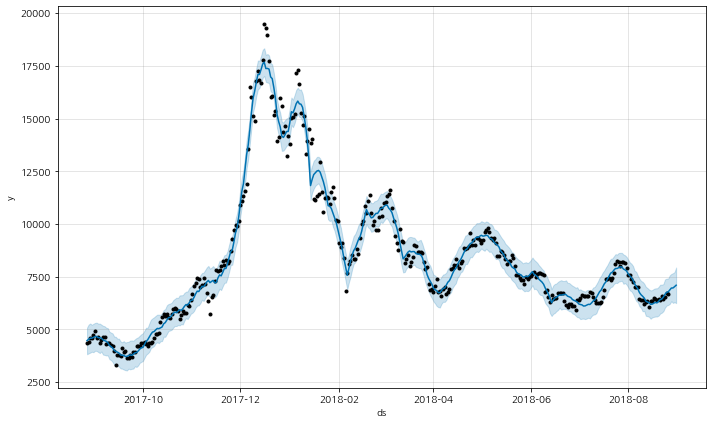

In [15]:
# 결과의 시각화
# 전체 데이터를 기반으로 학습한, 5일 단위의 예측 결과를 시각화합니다.
fig1 = prophet.plot(forecast_data)

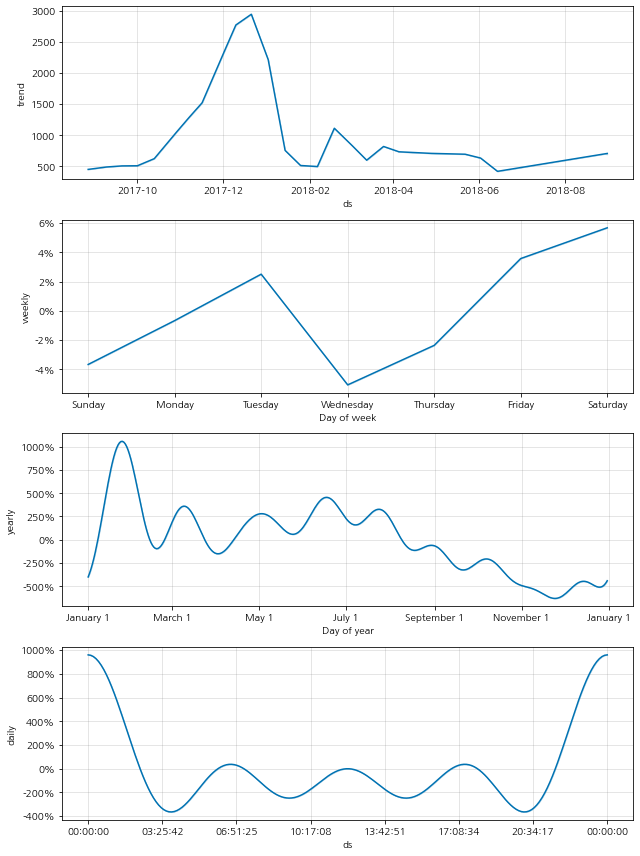

In [16]:
# seasonality_mode로 설정했었던 기간별 트렌드 정보를 시각화합니다.
fig2 = prophet.plot_components(forecast_data)

In [17]:
# 실제 가격과 예측한 가격간의 차이: 첫 5일과 마지막 5일은 제외하고 계산합니다.

y = bitcoin_df.y.values[5:]   # 첫 5일을 제외한 실제 가격 데이터 입니다.
y_pred = forecast_data.yhat.values[5:-5]    # 첫 5일, 마지막 5일을 제외한 예측가격 데이터 입니다.


In [18]:
bitcoin_test_df = pd.read_csv(test_file_path, names = ['ds','y'])

pred_y = forecast_data.yhat.values[-5:]    # 마지막 5일의 예측 데이터 입니다.
test_y = bitcoin_test_df.y.values    # 실제 5일 가격 데이터 입니다.
pred_y_lower = forecast_data.yhat_lower.values[-5:]   #마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = forecast_data.yhat_upper.values[-5:]    # 마지막 5일의 예측 데이터의 최대값입니다.

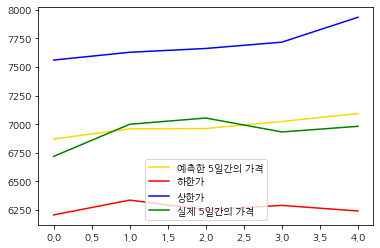

In [19]:
font_fname = 'C:/Users/USER/anaconda3/envs/pybook/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

plt.plot(pred_y, color="gold", label = '예측한 5일간의 가격') # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red",label = '하한가') # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue",label = '상한가') # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green",label = '실제 5일간의 가격') # 실제 가격 그래프입니다.
plt.legend()

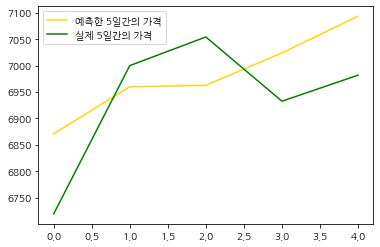

In [20]:
plt.plot(pred_y, color="gold", label = '예측한 5일간의 가격') # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green",label = '실제 5일간의 가격') # 실제 가격 그래프입니다.
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

103.75008315637291


In [25]:
'''
더 나은 결과를 위한 방법들
- 상한가 및 하한가 선정
- 주가데이터의 경우 의미가 없지만, 일반적인 시계열 데이터의 경우 상한값 혹은 하한값을 잘 설정해주는 것이 도움이 되기도 한다.
'''

bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'])

#상한가를 설정합니다.
bitcoin_df['cap'] = 20000

#상한가 적용을 위한 파라미터를 다음과 같이 설정합니다.
prophet = Prophet(seasonality_mode = 'multiplicative',
                 growth = 'logistic',
                 yearly_seasonality = True,
                 weekly_seasonality = True, daily_seasonality = True,
                 changepoint_prior_scale = 0.5)
prophet.fit(bitcoin_df)

In [26]:
# 5일을 내다보며 예측합니다.
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

#상한가를 설정합니다.
future_data['cap'] = 20000
forecast_data = prophet.predict(future_data)

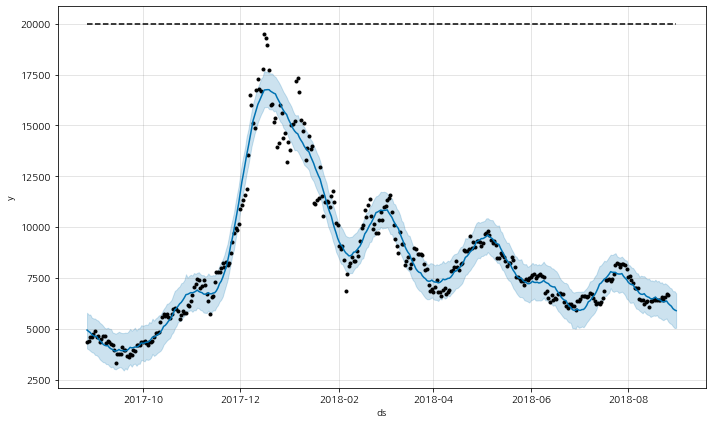

In [27]:
fig = prophet.plot(forecast_data)

In [28]:
'''
실제 데이터와의 비교
 - 비트 코인 데이터의경우 , 상한선을 둠으로써 오히려 예측력이 다소 떨어지는 결과를 보인다.
'''

bitcoin_test_df = pd.read_csv(test_file_path, names =  ['ds', 'y'])

#모델이 예상한 마지막 5일의 가격 데이터를 가져옵니다.
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
perd_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

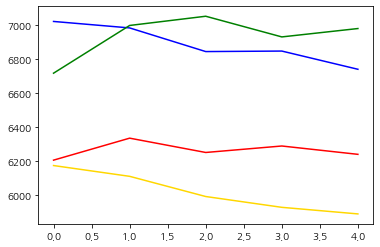

In [30]:
plt.plot(pred_y, color = 'gold')    #모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color = 'red')    #모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color = 'blue')    #모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color = 'green')    # 실제 가격 그래프입니다.

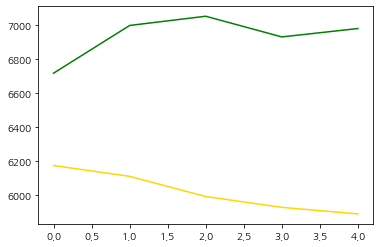

In [31]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [32]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

938.3434741548057


In [35]:
'''
이상치 제거하기
'''
# 가격이 18000을 넘어가는 값을 이상치로 판단하여 제거합니다.

bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'])
bitcoin_df.loc[bitcoin_df['y'] > 18000, 'y'] = None

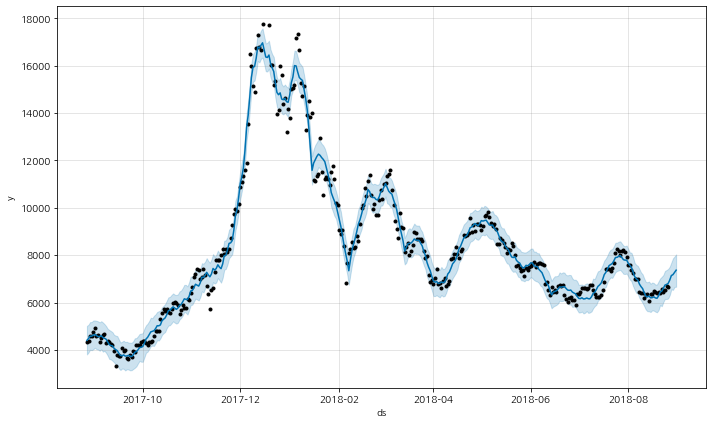

In [39]:
# prophet모델을 학습
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                  weekly_seasonality = True, daily_seasonality = True,
                  changepoint_prior_scale = 0.5)
prophet.fit(bitcoin_df)

#5일 단위의 미래를 예측합니다.
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)

#예측 결과를 그래프로 출력합니다.
fig = prophet.plot(forecast_data)